In [1]:
import sys
sys.path.append('../src/')


from tenzing.core.model.typesets import *
from tenzing.core.model.types import *
from tenzing.core.typesets import *
import os

import datetime
import numpy as np
import networkx as nx
from functools import reduce
import operator

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


%matplotlib inline

In [2]:

df = pd.DataFrame(
        {
            "item_id": [1, 1, 3],
            "item_cost": [2.1, 3.5, 4],
            "item_name": ["orange", "orange", "apple"],
            "sale_date": pd.to_datetime(
                [
                    datetime.date(2011, 1, 1),
                    datetime.date(2012, 1, 2),
                    datetime.date(2013, 1, 1),
                ]
            ),
            "store_location": pd.Series(
                ["POINT (12 42)", "POINT (100 42.723)", "POINT (0 0)"]
            ),
            "COGS": pd.Series([np.nan, 1.1, 2.1]).astype(str),
            "is_still_available": [True, False, True],
            "is_expired": ["True", "false", "False"],
            "is_person": ["Y", "N", "Y"],
            "website": [
                "http://www.google.com",
                "http://www.bing.com",
                "http://www.duckduckgo.com",
            ],
            "complex_record": [np.complex(1, 2), np.complex(3, 4), np.complex(5, 6)],
            "path_linux": [
                r"/home/user/test.txt",
                r"/home/user/test.bat",
                r"/home/user/test.sh",
            ],
            "path_win": [
                r"C:\Users\test.txt",
                r"C:\Users\test.bat",
                r"C:\Users\test.sh",
            ],
        }
    )
x = tenzing_complete_set()
y = tenzing_complete_set()
x.prep(df)

In [3]:
tdf = x.cast_to_inferred_types(df)

In [4]:
y.prep(tdf)
y.column_type_map

{'item_id': Generic[tenzing_integer],
 'item_cost': Generic[tenzing_float],
 'item_name': Generic[tenzing_string],
 'sale_date': Generic[tenzing_generic],
 'store_location': Generic[tenzing_geometry],
 'COGS': (Generic, Missing)[tenzing_float],
 'is_still_available': Generic[tenzing_bool],
 'is_expired': Generic[tenzing_bool],
 'is_person': Generic[tenzing_bool],
 'website': Generic[tenzing_url],
 'complex_record': Generic[tenzing_complex],
 'path_linux': Generic[tenzing_path],
 'path_win': Generic[tenzing_string]}

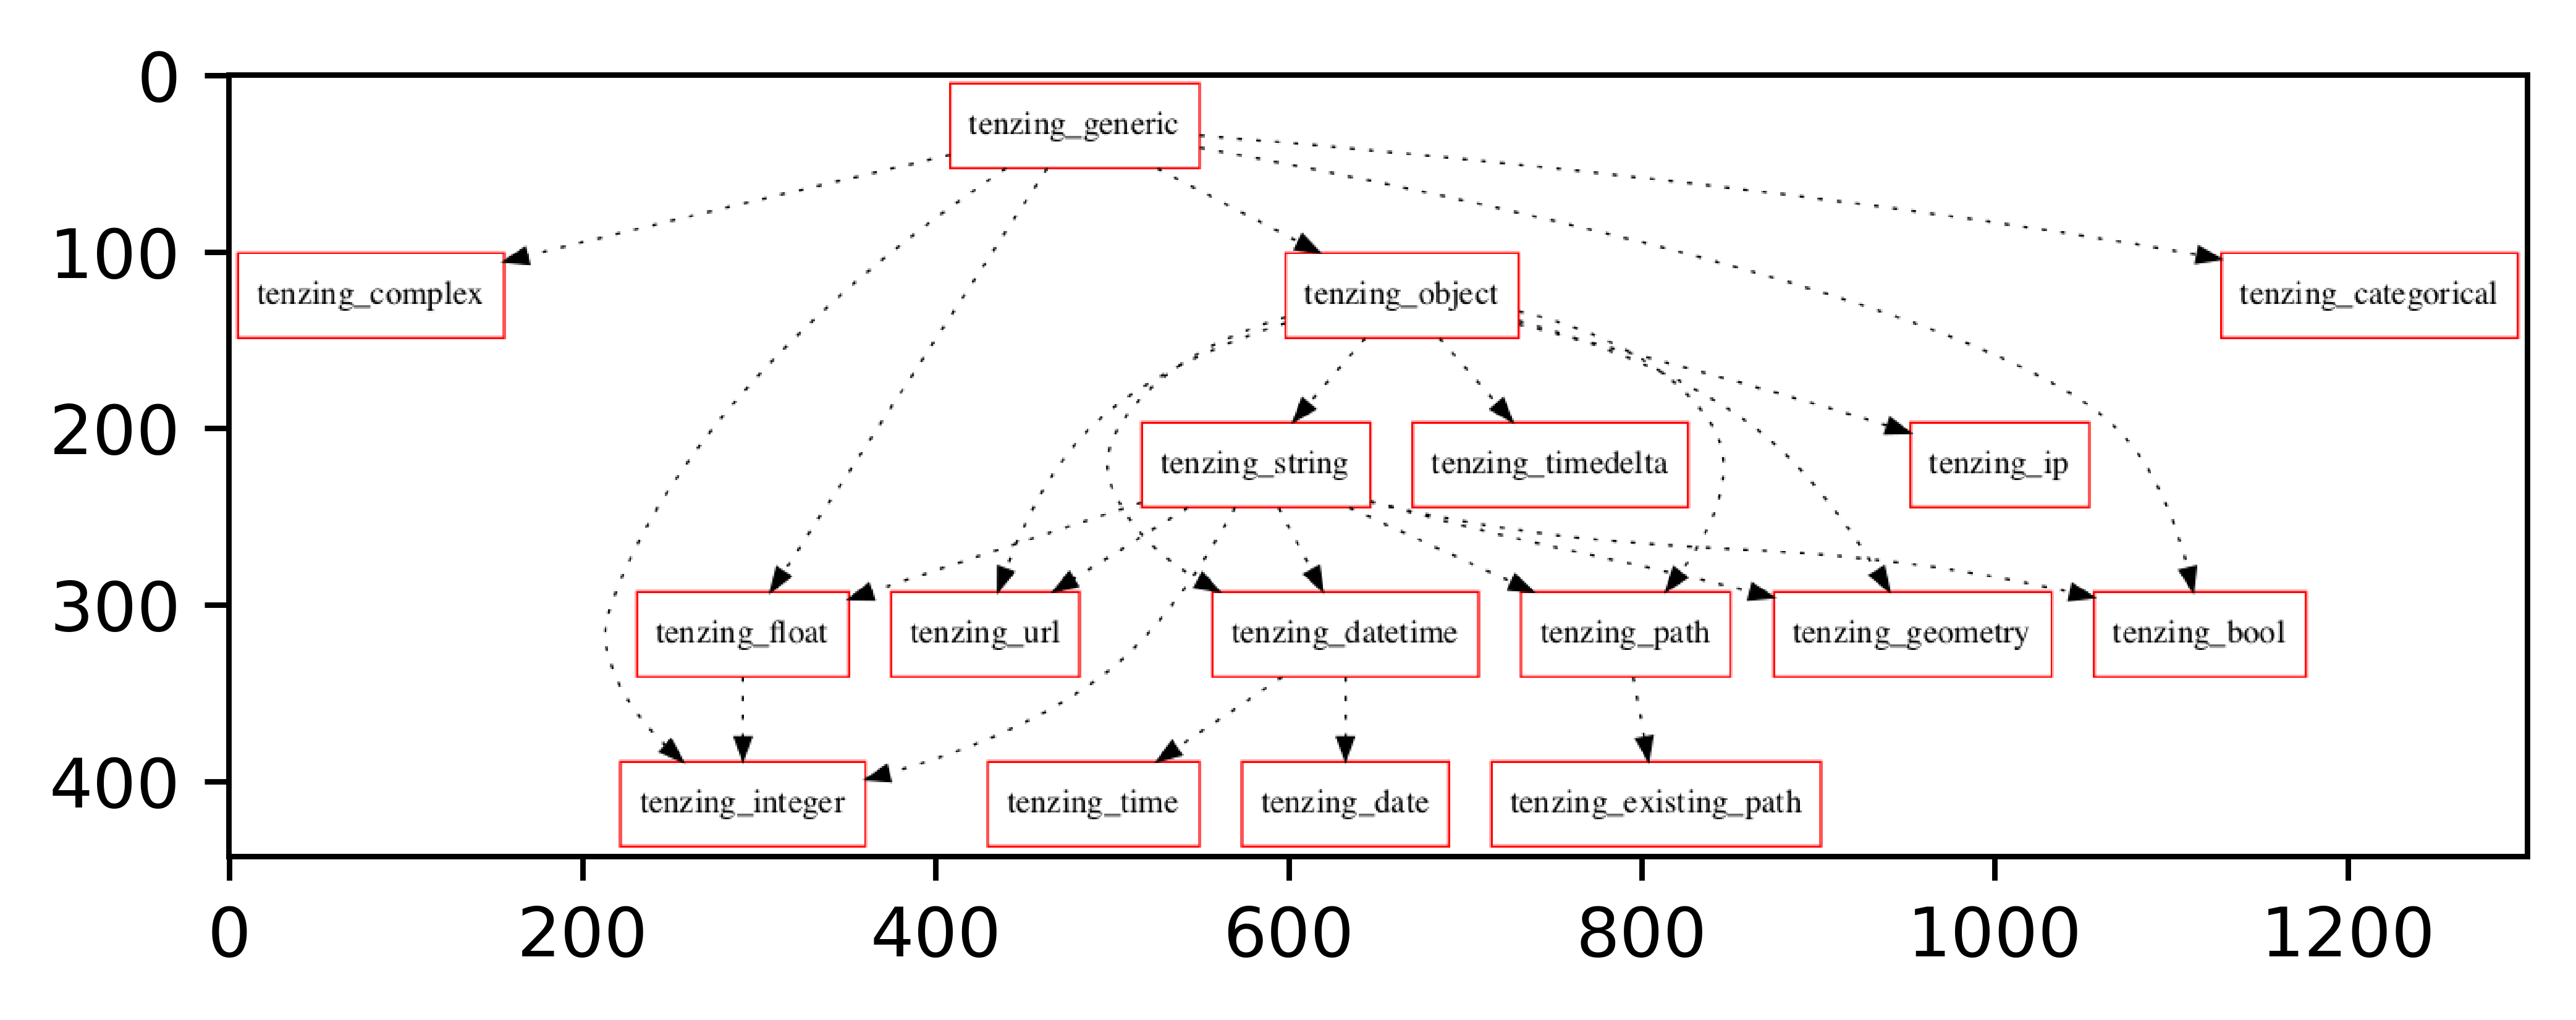

In [5]:
x.plot_graph()

In [6]:
from urllib.parse import urlparse
def test_url(series):
    try:
        return (
            series.apply(urlparse).apply(lambda x: all((x.netloc, x.scheme))).all()
        )
    except AttributeError:
        return False
test_url(df['website'])

True

In [14]:
series = df['website']
y.infer_series_type(series)

Generic[tenzing_url]

In [15]:
y.cast_series(series)

0        (http, www.google.com, , , , )
1          (http, www.bing.com, , , , )
2    (http, www.duckduckgo.com, , , , )
Name: website, dtype: object

In [5]:
from tenzing.core.partitioners import generic

In [6]:
generic.__class__

Generic

In [8]:
pd.Series([1,2,3]).dt

AttributeError: Can only use .dt accessor with datetimelike values